## IterativeImputer

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\tyagi\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Categorical variables in the dataset?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [6]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


Visual representation of missing values

<AxesSubplot:>

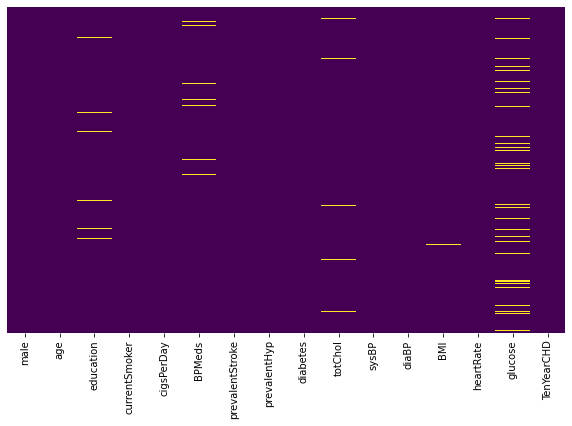

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import IterativeImputer

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Create IterativeImputer object with max_iterations and random_state=0

In [9]:
imputer = IterativeImputer(max_iter=10, random_state=0)

### Optional - converting df into numpy array

In [10]:
data = df.values

In [11]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to perform iterative multivariate imputation

In [13]:
imputer.fit(X)

IterativeImputer(random_state=0)

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values using transform( ) 

In [14]:
X_transform = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [15]:
print(f"Missing cells: {sum(np.isnan(X).flatten())}")

Missing cells: 645


In [16]:
print(f"Missing cells: {sum(np.isnan(X_transform).flatten())}")

Missing cells: 0


### Let's try to visualize the missing values.

<AxesSubplot:>

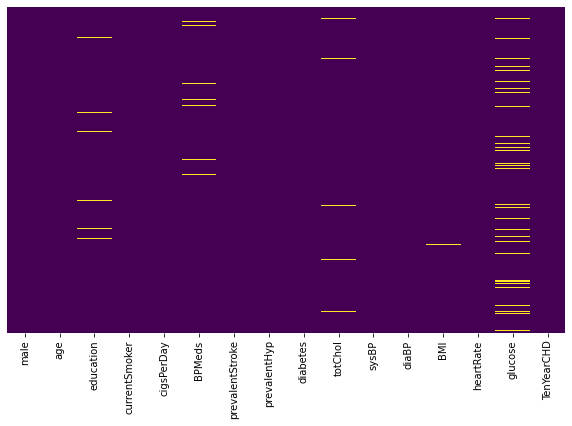

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(X_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

<Figure size 720x432 with 0 Axes>

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [19]:
df_transform = pd.DataFrame(data=X_transform)
df_transform

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.00000
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.00000
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.00000
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.00000
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.00000
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.00000
4235,0.0,48.0,2.0,1.0,20.0,0.01547,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.00000
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,77.74894


<AxesSubplot:>

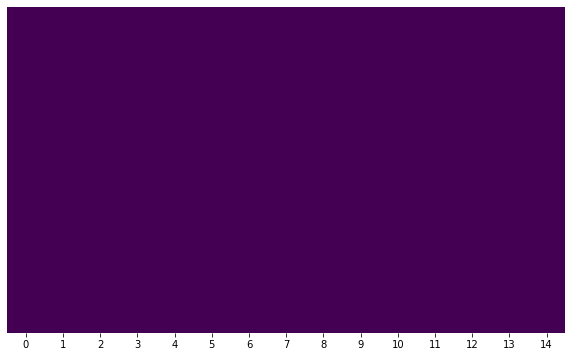

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [21]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [22]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<AxesSubplot:>

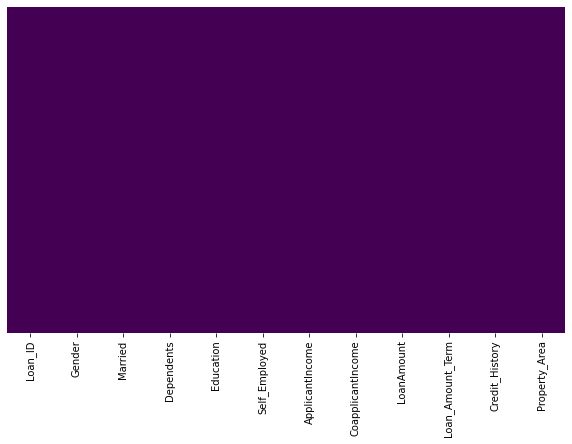

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [23]:
X_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Build a Logistic Regression model Without imputation

In [25]:
df=pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv')
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [30]:
df=pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [31]:
df.shape

(4238, 16)

### Drop rows with missing values

In [32]:
df = df.dropna()
df.shape

(3656, 16)

### Split dataset into X and y

In [33]:
X = df[df.columns[:-1]]
X.shape

(3656, 15)

In [34]:
y = df[df.columns[-1]]
y.shape

(3656,)

### Create a pipeline with model parameter

In [35]:
pipeline = Pipeline([('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [36]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [37]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [38]:
scores

array([0.8579235 , 0.84699454, 0.85245902, 0.84699454, 0.84699454,
       0.83606557, 0.84657534, 0.85479452, 0.84109589, 0.84109589,
       0.85245902, 0.84972678, 0.85519126, 0.84153005, 0.85519126,
       0.8442623 , 0.84109589, 0.84383562, 0.85205479, 0.84931507,
       0.85245902, 0.84972678, 0.8579235 , 0.8442623 , 0.84972678,
       0.84972678, 0.84931507, 0.85205479, 0.84383562, 0.83561644])

### Print the Mean Accuracy and Standard Deviation from scores

In [39]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.006


# Build a Logistic Regression model with IterativeImputer

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [41]:
df=pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [42]:
df.shape

(4238, 16)

In [43]:
X = df[df.columns[:-1]]
X.shape

(4238, 15)

In [44]:
y = df[df.columns[-1]]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

### Create a SimpleImputer with mean strategy

In [45]:
imputer = IterativeImputer(max_iter=10, random_state=0)

### Create a Logistic Regression model

In [46]:
model = LogisticRegression()

### Create a pipeline with impute and model parameters

In [47]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [48]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [49]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [50]:
scores

array([0.8490566 , 0.85377358, 0.8490566 , 0.8490566 , 0.84433962,
       0.84669811, 0.85377358, 0.8490566 , 0.84869976, 0.8534279 ,
       0.8490566 , 0.85141509, 0.85141509, 0.85613208, 0.84433962,
       0.84669811, 0.84669811, 0.8490566 , 0.84397163, 0.85106383,
       0.85613208, 0.85141509, 0.84669811, 0.84669811, 0.85377358,
       0.85141509, 0.8490566 , 0.85613208, 0.85579196, 0.8463357 ])

### Print the Mean Accuracy and Standard Deviation

In [51]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.85  | Std: 0.004


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

The IterativeImputer accuracy is better as it gives lower variance i.e less variation in accuracy across samples.

# IterativeImputer with RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [53]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [54]:
model = RandomForestClassifier()

In [55]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

In [56]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [57]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [58]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.007


# Run experiments with different Imputation methods and different algorithms

## Imputation Methods
- Mean
- Median
- Most_frequent
- Constant
- IterativeImputer

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

In [61]:
from sklearn.impute import SimpleImputer

results =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results.append(scores)
    
for method, accuracy in zip(strategies, results):
    print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}   |   Max accuracy: {round(np.max(accuracy), 3)} | STD:{round(np.std(accuracy),4)}")          

Strategy: mean >> Accuracy: 0.848   |   Max accuracy: 0.865 | STD:0.0054
Strategy: median >> Accuracy: 0.848   |   Max accuracy: 0.863 | STD:0.0059
Strategy: most_frequent >> Accuracy: 0.849   |   Max accuracy: 0.861 | STD:0.0061
Strategy: constant >> Accuracy: 0.849   |   Max accuracy: 0.863 | STD:0.0062


Best strategy for this dataset using Random Forest algorithm?
- SimpleImputer(Mean)
- SimpleImputer(Median)
- SimpleImputer(Most_frequent)
- SimpleImputer(Constant)
- IterativeImputer

In [ ]:
# The model with that strategy is better which  has lower variance between various fold accuracies.However in Random Forest model, the best strategy is changing with every iteration.

Best algorithm for this dataset using IterativeImputer?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm

SVM is the best algorithm with mean strategy here with lowest standard deviation across folds 

# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant, IterativeImputer
- Logistic Regression, Random Forest, KNN

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.svm import SVC

algo = [RandomForestClassifier(),LogisticRegression(),KMeans(n_clusters=2),SVC(C= 1, gamma= 0.01, kernel= 'rbf', random_state=42)]

for a in algo:
    print(a)
    results =[]
    strategies = ['mean', 'median', 'most_frequent','constant']

    for s in strategies:
        pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model', a)])
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        results.append(scores)
    
    for method, accuracy in zip(strategies, results):
        print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}   |   Max accuracy: {round(np.max(accuracy), 3)} | Std: {round(np.std(accuracy), 3)}")
          
    pipeline1 = Pipeline([('impute', IterativeImputer(max_iter=10, random_state=0)),('model', a)])
    cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores1 = cross_val_score(pipeline1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
    print(f"II Accuracy: {round(np.mean(scores1), 3)}  |   Max accuracy: {round(np.max(accuracy), 3)} | Std: {round(np.max(accuracy), 3)}")            

RandomForestClassifier()
Strategy: mean >> Accuracy: 0.849   |   Max accuracy: 0.865 | Std: 0.007
Strategy: median >> Accuracy: 0.848   |   Max accuracy: 0.863 | Std: 0.006
Strategy: most_frequent >> Accuracy: 0.849   |   Max accuracy: 0.863 | Std: 0.006
Strategy: constant >> Accuracy: 0.849   |   Max accuracy: 0.863 | Std: 0.006
II Accuracy: 0.849  |   Max accuracy: 0.863 | Std: 0.863
LogisticRegression()
Strategy: mean >> Accuracy: 0.85   |   Max accuracy: 0.858 | Std: 0.004
Strategy: median >> Accuracy: 0.85   |   Max accuracy: 0.858 | Std: 0.004
Strategy: most_frequent >> Accuracy: 0.849   |   Max accuracy: 0.856 | Std: 0.004
Strategy: constant >> Accuracy: 0.849   |   Max accuracy: 0.866 | Std: 0.005
II Accuracy: 0.85  |   Max accuracy: 0.866 | Std: 0.866
KMeans(n_clusters=2)
Strategy: mean >> Accuracy: 0.495   |   Max accuracy: 0.615 | Std: 0.094
Strategy: median >> Accuracy: 0.482   |   Max accuracy: 0.634 | Std: 0.093
Strategy: most_frequent >> Accuracy: 0.515   |   Max accurac

SVM is the best algorithm with constant strategy here with lowest standard deviation across folds 